# Before jumping to the code implementation
***
- Git을 사용하지 않고 해당 ipynb파일만 다운받고 싶으면 wget이나 curl을 사용하여도 좋습니다. 
    - wget https://raw.githubusercontent.com/COMBINE-SKKU/bio_data_mining/master/Lecture7-Dimensionality_Reduction-Eigenface.ipynb
    - curl https://raw.githubusercontent.com/COMBINE-SKKU/bio_data_mining/master/Lecture7-Dimensionality_Reduction-Eigenface.ipynb --output Lecture7-Dimensionality_Reduction-Eigenface.ipynb
<br><br><br>    
- 동영상과 같이 git clone을 사용하고 싶은 학생이 주의하여야 할 점은 git은 원칙적으로 이미 존재하는 디렉토리에는 clone을 하지 않으므로 디렉토리 (예를 들자면 /Documents/BioDataMining)를 지워주고 실행하여야 합니다. 
- Open the terminal and make a directory dedicated for this class code implementation (e.g., mkdir ~/Documents/BioDataMining)
- Install Git (https://git-scm.com/book/en/v2/Getting-Started-Installing-Git)
- Go to the directory for this class, and type: git clone https://github.com/COMBINE-SKKU/bio_data_mining.git
- If you are a newbie for programming a python and jupyter notebook, please install anaconda 
    - Window: https://problemsolvingwithpython.com/01-Orientation/01.03-Installing-Anaconda-on-Windows/
    - Mac: https://problemsolvingwithpython.com/01-Orientation/01.04-Installing-Anaconda-on-MacOS/
    - Linux: https://problemsolvingwithpython.com/01-Orientation/01.05-Installing-Anaconda-on-Linux/
- And learn how to open a jupyter notebook (https://www.youtube.com/watch?v=OJMILWh6ARY)
- Run the following codes.

# Principal Component Analysis
---

(200, 2)


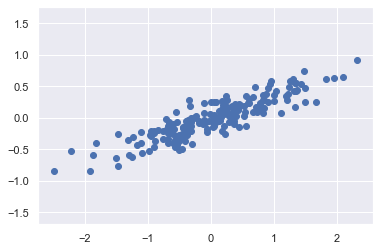

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Data generation
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');
print(X.shape)

- Extracting principal components
    1. If the original matrix is <b>symmetric</b>, perform eigen value decomposition  for a covariance matrix of the original data matrix or
    2. If the matrix is <b>non-symmetric</b>, Perform singular value decomposition on the raw data matrix.
    3. EVD: \\(X^TX = QUQ^T\\)
        - \\(Eigenvector\\) -> Principal component direction
        - \\(Eigenvalue\\) -> Amount of variances explained
    4. SVD: \\(X=USV^T\\)
        - \\(V^T=Eigenvector\\)
        - \\(S^2\over \sqrt{n-1}\\) \\(=Eigenvalue\\)
        - XV (=US) = Principal scores

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)  

print(pca.components_) # PC direction vector
print(pca.explained_variance_) # PC importance

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


[(-3, 3.1),
 Text(0, 0.5, 'component 2'),
 (-5, 5),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'principal components')]

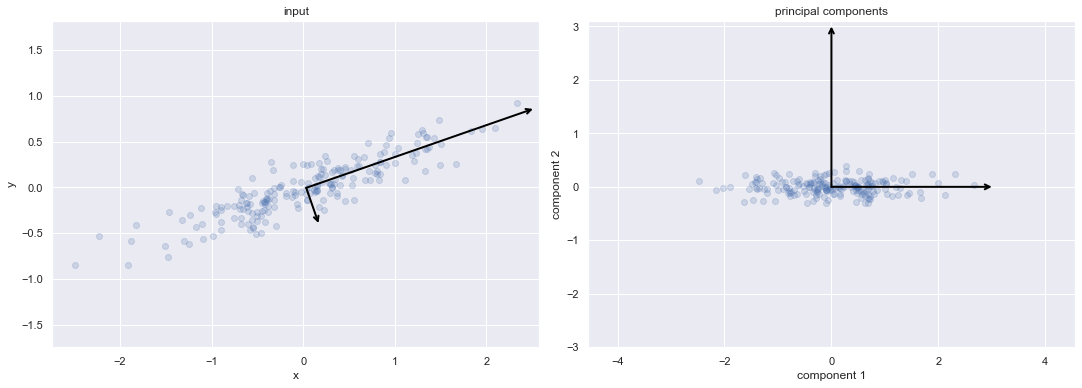

In [5]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,  color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = -vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

# Hand-written digits
---

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [8]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data) # fit -> transform
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


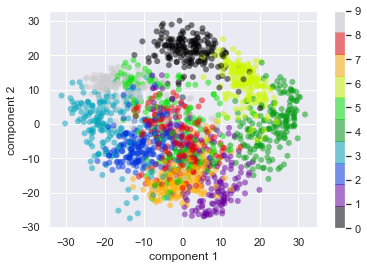

In [36]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# What do these components mean?
---
- A combinations of basis vectors?
<br>
<img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week7/Fig7-7.png' width="600"/>
<br>
<img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week7/Fig7-4.png' width="600"/>
<br>
<img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week7/Fig7-5.png' width="600"/>
<br>
- If we use only the first eight PCs: 86% of data reduction!


# PCA as Noise Filtering
---

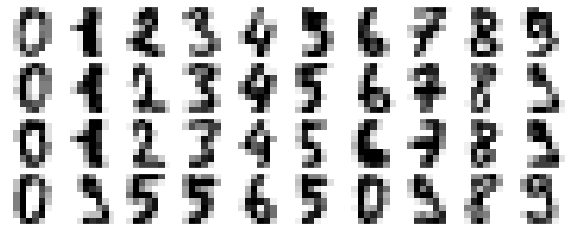

In [41]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
        
plot_digits(digits.data)

- Now lets add some random noise to create a noisy dataset, and re-plot it:

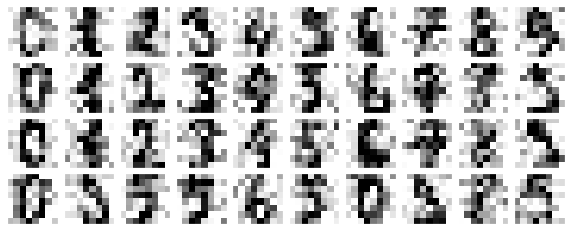

In [42]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [10]:
digits.data.shape

(1797, 64)

In [43]:
# Train a PCA on the noisy data, requesting that the projection preserve 50% of the variance
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

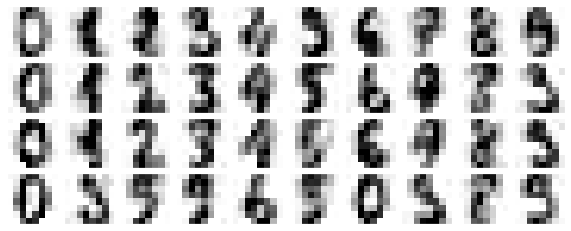

In [44]:
# PCA reconstruction using PCx explaining 50% of variance.
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# Example: Eigenfaces
---
- Use labeled Faces in the Wild dataset made available through Scikit-Learn

In [45]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


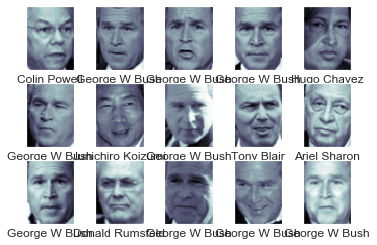

In [46]:
# Let's plot a few of these faces to see what we're working with
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

# Each image contains [62×47] or nearly 3,000 pixels. 

- Let's take a look at the principal axes that span this dataset. 
- Because this is a large dataset, we will use PCA.
- We will take a look at the first 150 components:

In [47]:
from sklearn.decomposition import PCA
pca = PCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

- Visualize the images associated with the first several principal components.
- These components are technically known as "eigenvectors," so these types of images are often called "eigenfaces".

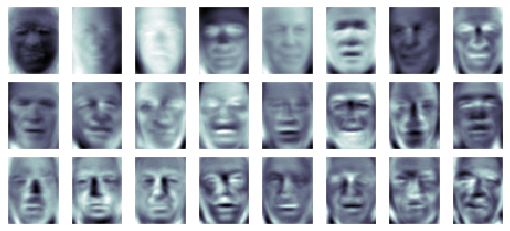

In [48]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

- For example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face. 
- Later principal vectors seem to be picking out certain features, such as eyes, noses, and lips.

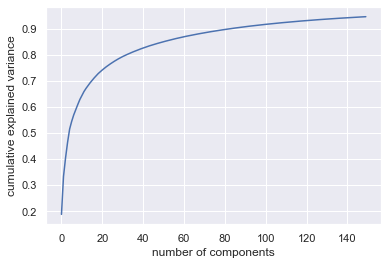

In [49]:
# cumulative variance 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# 150 components account for just over 90% of the variance.

In [50]:
# Face reconstruction
# Compute the components and projected faces
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

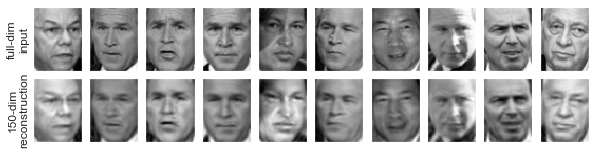

In [51]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

# Interpretation
---
- It reduces the dimensionality of the data by nearly a factor of 20,
- The projected images contain enough information that we might, by eye, recognize the individuals in the image. 
- What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose,
- Dimensionalrity reduction can lead to a much more efficient classification.